In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def u_xt(x, t, N):
    L = 3
    u = np.zeros_like(x)
    for n in range(1, 2*N, 2):
        coef = 4 / (n * np.pi)
        term = coef * np.sin(n * np.pi * x / L) * np.exp(-2 * np.pi / L)**2 * t
        u += term
    return u


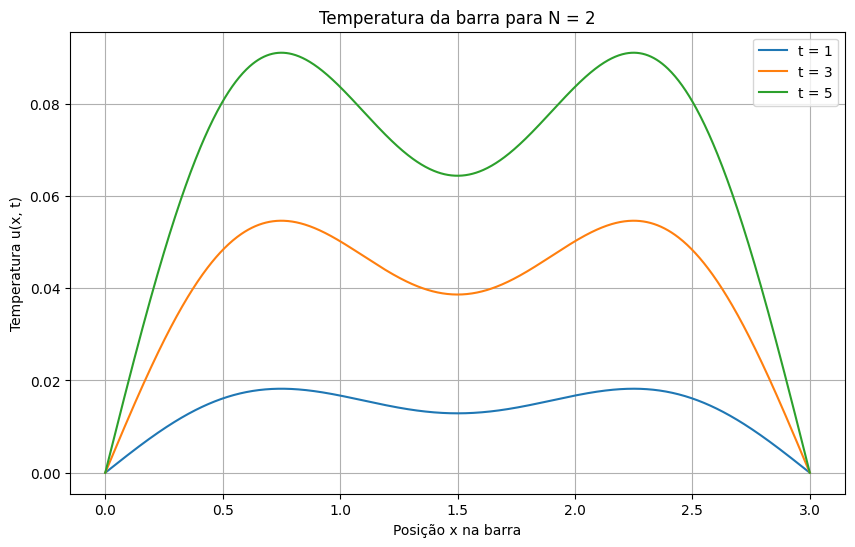

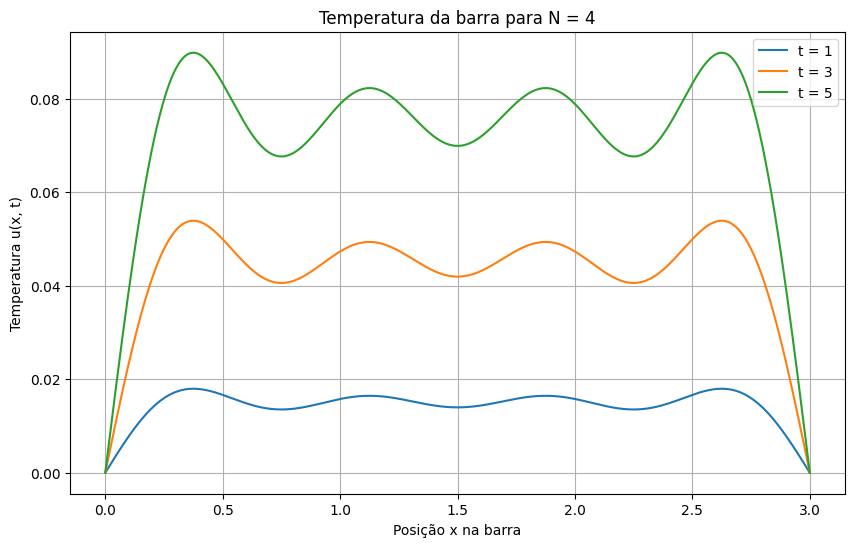

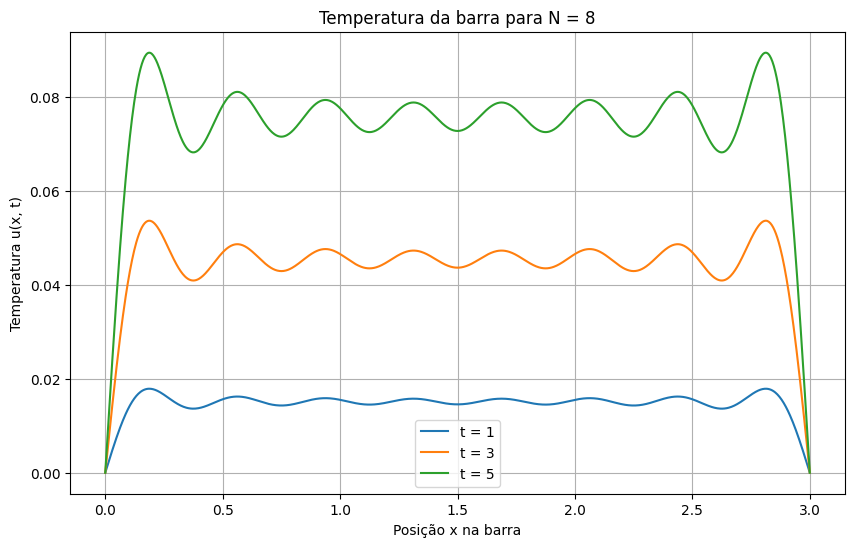

In [19]:
# Definir o intervalo de x
x = np.linspace(0, 3, 1000)

# Valores de t e N
t_values = [1, 3, 5]
N_values = [2, 4, 8]

# Loop sobre os valores de N
for N in N_values:
    plt.figure(figsize=(10, 6))
    # Loop sobre os valores de t
    for t in t_values:
        u = u_xt(x, t, N)
        plt.plot(x, u, label=f't = {t}')
    plt.title(f'Temperatura da barra para N = {N}')
    plt.xlabel('Posição x na barra')
    plt.ylabel('Temperatura u(x, t)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [6]:
def f_original(x):
    return x

In [163]:
def fourier_series(x, N):
    a0 = 2
    sum = a0 / 2
    for n in range(1, N):
        an = (-4 * ((-1)**n)) / (n**2 * np.pi**2)
        sum += an * np.cos(n * np.pi * x / 2)
    return sum

def fourier_series(x, N):
    L = 2
    a0 = 1
    partial_sum = a0
    for k in range(N):
        n = 2 * k + 1
        # coefficient = 8 / (n**2 * np.pi**2)
        coefficient = (4 / (np.pi**2 * n**2)) * np.cos(n*np.pi - 1) 
        partial_sum += coefficient * np.cos((n * np.pi * x) / L)
    return partial_sum

In [142]:
x = np.linspace(0, 2, 400)
N_values = [3, 10, 20]      # Valores de N para a soma parcial


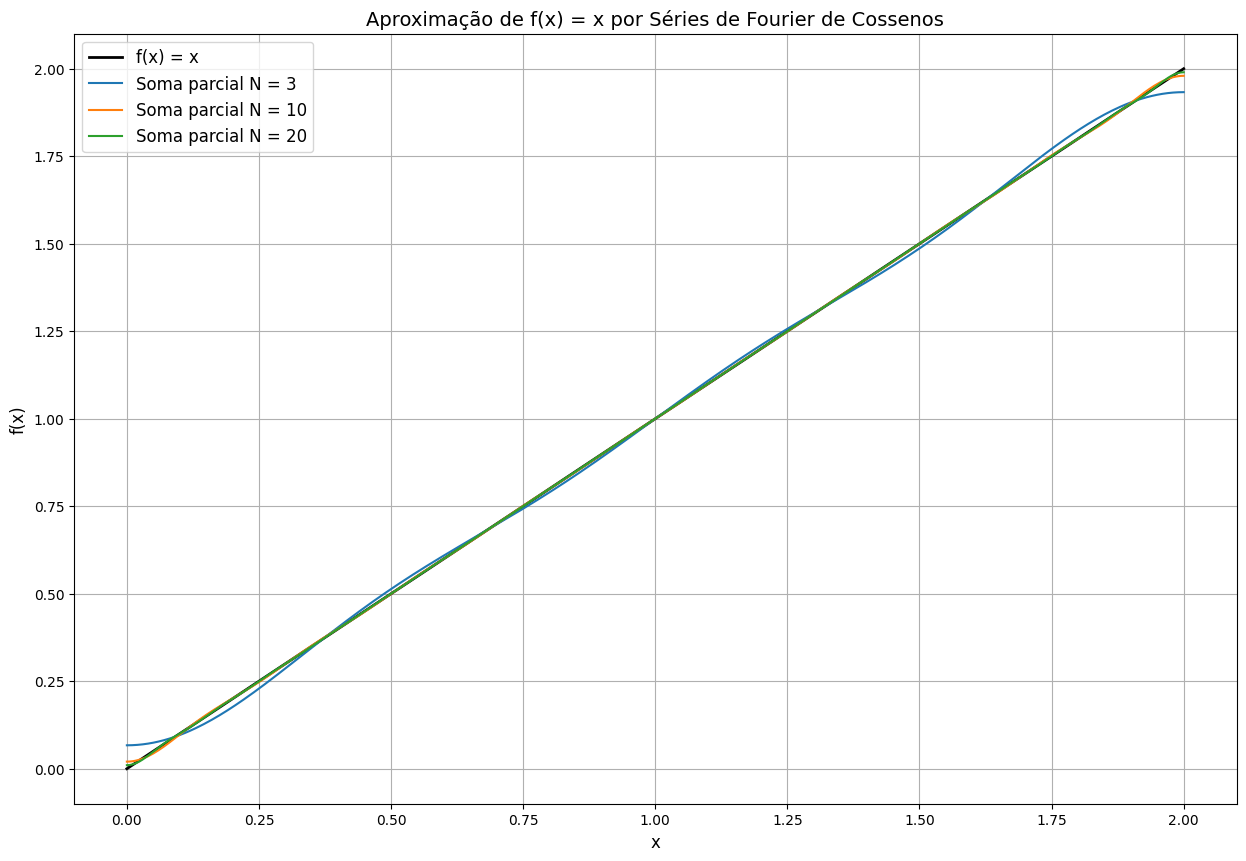

In [165]:
def fourier_series_cos(x, N):
    # Termo constante
    f = 1
    # Somatório dos termos da série
    for k in range(N):
        f -= (8 / (np.pi**2)) * (1 / ((2 * k + 1)**2)) * np.cos((2 * k + 1) * np.pi * x / 2)
        #f += (4 / (np.pi * k)**2 ) * np.cos(k * np.pi - 1) * np.cos(2 * k + 1) * np.pi * x / 2
       # f -= (1 / ((2 * k + 1)**2)) * np.cos((2 * k + 1) * np.pi * x / 2)
    return f


# Calcular a função original
y_original = f_original(x)

# Criar o gráfico
plt.figure(figsize=(15, 10))

# Plotar a função original
plt.plot(x, y_original, label='f(x) = x', color='black', linewidth=2)

# Loop sobre os valores de N
for N in N_values:
    y_partial = fourier_series_cos(x, N)
    plt.plot(x, y_partial, label=f'Soma parcial N = {N}')

# Configurar o gráfico
plt.title('Aproximação de f(x) = x por Séries de Fourier de Cossenos', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()